In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures


df = pd.read_csv('../Data/Auto.csv', na_values = '?').dropna()


In [88]:
a = np.linspace(100,390, num = 290, dtype=int)
err_rate = np.zeros(290)
for i in range(100,390):
    train = df.sample(i, random_state = 1)
    test = df[~df.isin(train)].dropna(how='all')
    lm = sm.OLS.from_formula('mpg~horsepower+np.square(horsepower)', train)
    result = lm.fit()
    pred = result.predict(test)
    MSE = np.mean(np.square(np.subtract(test["mpg"],pred)))
    err_rate[i-100] = MSE

import matplotlib.pyplot as plt
plt.plot(a,err_rate)
plt.xlabel("Training Split Sizes")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

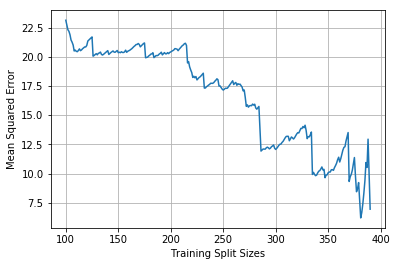

In [99]:
p_order = np.arange(1,11)
r_state = np.arange(0,10)

regr = skl_lm.LinearRegression()
loo = LeaveOneOut()
loo.get_n_splits(df)
scores = list()

for i in p_order:
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(df.horsepower.values.reshape(-1,1))
    score = cross_val_score(regr, X_poly, df.mpg, cv=loo, scoring='neg_mean_squared_error').mean()
    scores.append(score)
    


In [100]:

folds = 10
elements = len(df.index)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size,r_state.size))

regr = skl_lm.LinearRegression()

for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(X[i,j])
    X_poly = poly.fit_transform(df.horsepower.values.reshape(-1,1))
    kf_10 = KFold(n_splits=folds, random_state=Y[i,j])
    Z[i,j] = cross_val_score(regr, X_poly, df.mpg, cv=kf_10, scoring='neg_mean_squared_error').mean()    


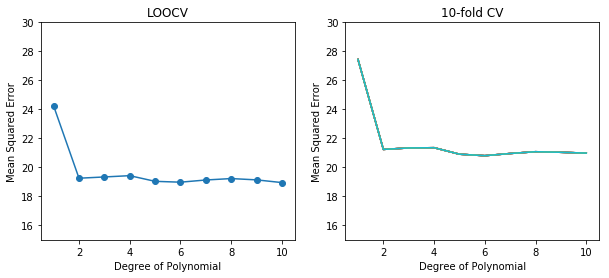

In [101]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

ax1.plot(p_order, np.array(scores)*-1, '-o')
ax1.set_title('LOOCV')

ax2.plot(X,Z*-1)
ax2.set_title('10-fold CV')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(15,30)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5,10.5)
    ax.set_xticks(range(2,11,2));